<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe13-TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. TSP

**Entrada**: Un grafo completo no dirigido $G=(V,E)$ y un valor $c_e$ para cada arco $e\in E$.

**Salida**: Un ciclo que pase por todos los vértices del grafo solo una vez con el coste mínimo, es decir, que minimice $\sum\limits_{e\in T}c_e$

El **TSP** (travelling salesman problem), o problema del vendedor viajero, consiste en determinar la ruta más corta pasando por todos los vértices de un grafo solo una vez y volviendo al vértice de origen. El siguiente ejemplo muestra una instancia del TSP, en donde los arcos sombreados forman el tour con el coste mínimo:

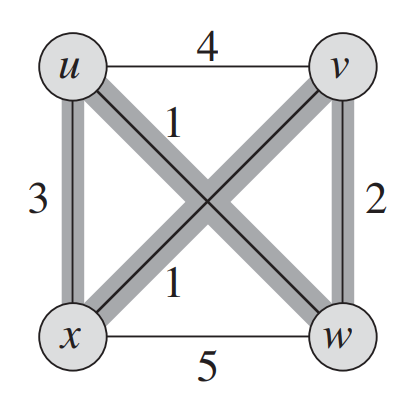

El TSP es un problema **NP-hard**. Esto se puede demostrar fácilmente aplicando reducción al problema del **ciclo hamiltoniano**, pues ambos problemas tratan de encontrar un ciclo que pase por todos los nodos del grafo. Por otro lado, al ser un problema NP-hard, es poco probable encontrar una solución en tiempo polinomial. Es por ello que se han inventado algoritmos que resuelven este problema de manera aproximada, entregando una solución en un tiempo razonable.

La cantidad total de rutas en un grafo completo es $(n-1)!/2$. Es decir, encontrar el tour más corto mediante un método de fuerza bruta que verifique cada uno de los caminos posibles tomaría un tiempo $O(n!)$, lo cual es bastante ineficiente. Por esta razón, se prefiere trabajar con algoritmos aproximados que entregan una solución inexacta al problema en tiempo polinomial.

# 2. TSP

## Generador de instancias

In [43]:
import numpy as np

def dist(c1, c2):
   return np.sqrt( (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 )    

def generate_tsp_instance(n: int):
    """
        Input: cantidad de vértices.
        Output: una matriz de n x n. Cada posición M[i][j] dentro de la matriz indica la distancia que existe entre el vértice i y el vértice j.
    """
    cities = []
    for i in range(n):
        x, y = np.random.uniform(-100, 100), np.random.uniform(-100, 100)
        cities.append([x, y])
        
    instance = []
    for i, coord1 in enumerate(cities):
        instance.append([])
        for j, coord2 in enumerate(cities):
            if i != j:
                instance[i].append(dist(coord1, coord2))
            else:
                instance[i].append(0)
          
    return instance

## Algoritmo de búsqueda local

In [65]:
import numpy as np

def tsp_local_search(G):

  # Calcula el costo del camino actual
  def calculate_cost():
    cost = 0
    for i in range(n-1):
      cost += G[path[i]][path[i+1]]
    return cost

  n = len(G) # Cantidad de vértices

  path = np.arange(n) # Camino ordenado de 0 a n
  np.random.shuffle(path) # Solución aleatoria

  while True:
    max_change = 0 # Decrecimiento máximo
    max_i = 0
    max_j = 0

    for i in range(n-2):
      for j in range(i+2, n-1):
        current = G[path[i]][path[i+1]] + G[path[j]][path[j+1]] # Costo actual
        new = G[path[i]][path[j]] + G[path[i+1]][path[j+1]] # Costo nuevo

        change = current - new # Se calcula el decrecimiento del costo

        if change > max_change: # Se guarda el decrecimiento máximo
          max_change = change
          max_i = i
          max_j = j
          
    # Dejamos de iterar cuando la solución no pueda mejorarse
    if max_change == 0: break

    # Creamos el nuevo camino para reducir el costo
    path[max_i+1:max_j+1] = path[max_i+1:max_j+1][::-1]

    cost = calculate_cost()

  return path, cost

In [67]:
graph = generate_tsp_instance(10)
path, cost = tsp_local_search(graph)
print(f"Tour: {path}")
print(f"Costo: {cost}")

Tour: [2 3 5 0 4 8 1 6 7 9]
Costo: 399.1060413309257
